In [1]:
import os 
import openai as model
import gradio
import hopsworks
project = hopsworks.login(host="d870ee90-691a-11ee-8150-c9a8e99989f0.cloud.hopsworks.ai", project="retail", api_key_value="WFPNUkD5XKrrf7f0.7Mo9yzu6JQVM53bdRq5GvWypWAeW9AGkzUa65QvViTgjC0PivqIhD7Ya7hBUxS4i")
fs = project.get_feature_store()
connection = hopsworks.connection()
secrets = connection.get_secrets_api()
model_key = secrets.get_secret("openai")
org_id = "org-1u7PipOgiHmvwfH7N16VkhuJ"
model.api_key = model_key.value

Connected. Call `.close()` to terminate connection gracefully.

Logged in to project, explore it here https://d870ee90-691a-11ee-8150-c9a8e99989f0.cloud.hopsworks.ai:443/p/2167
Connected. Call `.close()` to terminate connection gracefully.
Connected. Call `.close()` to terminate connection gracefully.


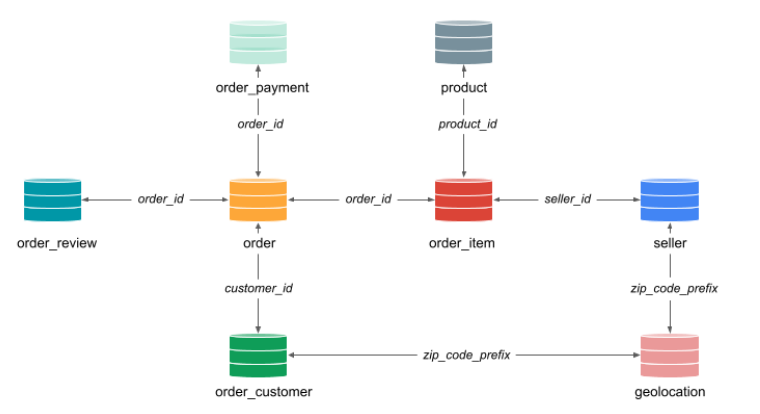

In [2]:
feature_view = fs.get_feature_view("product_orders", version=1)
feature_view.init_serving(training_dataset_version=1)
df = feature_view.get_feature_vector(entry={"order_id" : "d7bd9020e0a2758aef0994ea533ee928", "order_item_id": 1, "product_id":"9ce4603565c839785b24a7e95e28f4eb"}, 
                            allow_missing=True, return_type="pandas")
df.to_string()
df

order_id order_item_id  \
0  d7bd9020e0a2758aef0994ea533ee928             1   

                         product_id                         seller_id  \
0  9ce4603565c839785b24a7e95e28f4eb  59fb871bf6f4522a87ba567b42dafecf   

   shipping_limit_date freight_value product_category_name product_name_len  \
0  2017-05-11 10:55:17         26.09            cool_stuff             40.0   

  product_description_len product_photos_qty product_weight_g  \
0                  1516.0                2.0            800.0   

  product_length_cm product_height_cm product_width_cm  
0              22.0              15.0             27.0

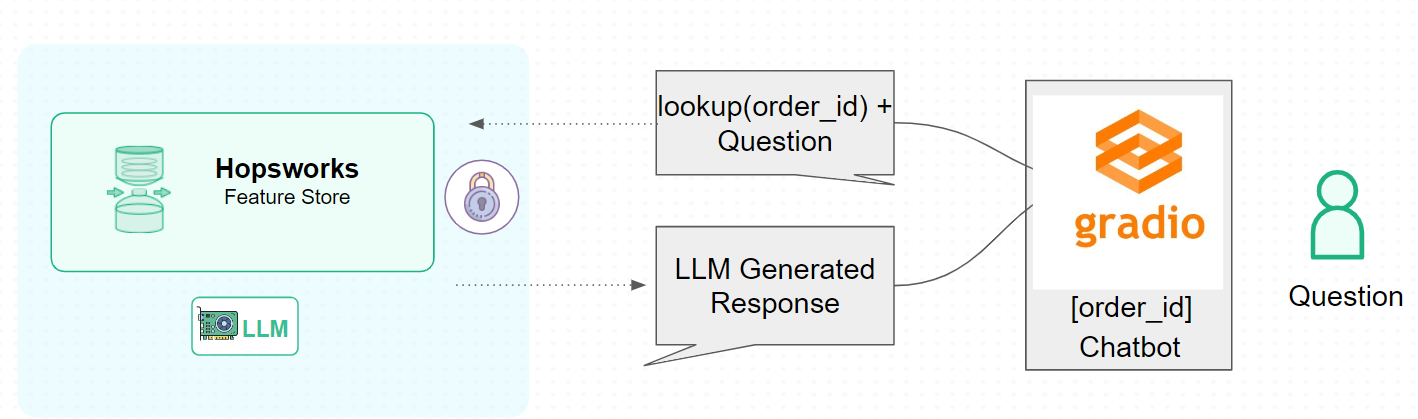

In [ ]:
prefix = df.to_string()

prompt = "Hi Jim. What's on your mind today?"
def api_calling(prompt):
    completions = model.Completion.create( 
        engine="text-davinci-003",
        prompt=prompt,
        max_tokens=1024,
        n=1,
        stop=None,
        temperature=0.5, 
    ) 
    message = completions.choices[0].text
    return message 
def message_and_history(input, history):
    history = history or []
    s = list(sum(history, ())) 
    s.append(input) 
    inp = ' '.join(s)
    template = """The following is a table with the first row containing column names and the second row containing column values. 
    The table represents my order of a product. The details of my order are in the 2nd row. \n"""
    inp = template + prefix + "\n" + inp
    print(inp)
    output = api_calling(inp) 
    history.append((input, output)) 
    return history, history 
block = gradio.Blocks(theme=gradio.themes.Monochrome()) 
with block: 
    gradio.Markdown("""<h1><center> 
    Hopsworks RAG ChatBot</center></h1> 
    """) 
    chatbot = gradio.Chatbot() 
    message = gradio.Textbox(placeholder=prompt) 
    state = gradio.State() 
    submit = gradio.Button("SEND") 
    submit.click(message_and_history,
                 inputs=[message, state],
                 outputs=[chatbot, state]) 
block.launch(debug = True, share=True)

Running on local URL:  http://127.0.0.1:7860
2023-10-19 17:40:33,659 INFO: Found credentials in shared credentials file: ~/.aws/credentials


Running on public URL: https://56134ad4a8a4871d65.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


The following is a table with the first row containing column names and the second row containing column values. 
    The table represents my order of a product. The details of my order are in the 2nd row. 
                           order_id order_item_id                        product_id                         seller_id  shipping_limit_date freight_value product_category_name product_name_len product_description_len product_photos_qty product_weight_g product_length_cm product_height_cm product_width_cm
0  d7bd9020e0a2758aef0994ea533ee928             1  9ce4603565c839785b24a7e95e28f4eb  59fb871bf6f4522a87ba567b42dafecf  2017-05-11 10:55:17         26.09            cool_stuff             40.0                  1516.0                2.0            800.0              22.0              15.0             27.0
did my order include any cool stuff?
The following is a table with the first row containing column names and the second row containing column values. 
    The table represents my orde